In [1]:
import tensorflow.keras as keras
from tensorflow.keras import backend as K
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

In [4]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

X = np.concatenate(
    [grab_image('./xception/images/image_%d.JPEG'%(i))
    for i in range(100)])

Y = np.loadtxt('./xception/class_labels.csv')
print(Y)
Y = keras.utils.to_categorical(Y)
print()
print(Y)
print(X.shape)
print(Y.shape)

[0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0.]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]


# 1
---

In [27]:
first_model = keras.Sequential()
# Note the input size (there is only one channel - intensity)
# these images... if you are using color images, your would
# need to set the last dimension of the input_shape to -3-
# above and this would carry over into this cell...
first_model.add(keras.layers.Conv2D(86, kernel_size=(8,8),
 activation='relu',
 input_shape=[X.shape[1],
 X.shape[2],
 X.shape[3]]))
first_model.add(keras.layers.Conv2D(128, (8,8), activation='relu'))
first_model.add(keras.layers.MaxPooling2D(pool_size=(4,4)))
first_model.add(keras.layers.Dropout(0.2))
first_model.add(keras.layers.Flatten())
first_model.add(keras.layers.Dense(128, activation='relu'))
first_model.add(keras.layers.Dropout(0.3))
first_model.add(keras.layers.Dense(Y.shape[1], activation='softmax'))
first_model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Adam(),
 metrics=[keras.metrics.CategoricalAccuracy()])
first_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 93, 93, 86)        16598     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 86, 86, 128)       704640    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 21, 21, 128)       0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 21, 21, 128)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 56448)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               7225472   
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)             

In [28]:
batch_size = 20
epochs = 30
history = first_model.fit(X, Y,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_split = 0.2)

Epoch 1/30
4/4 [==============================] - 11s 3s/step - loss: 3.5393 - categorical_accuracy: 0.5000 - val_loss: 0.6222 - val_categorical_accuracy: 0.7500
Epoch 2/30
4/4 [==============================] - 10s 3s/step - loss: 0.8068 - categorical_accuracy: 0.6000 - val_loss: 0.6910 - val_categorical_accuracy: 0.7500
Epoch 3/30
4/4 [==============================] - 10s 3s/step - loss: 0.6926 - categorical_accuracy: 0.6000 - val_loss: 0.6924 - val_categorical_accuracy: 0.7500
Epoch 4/30
4/4 [==============================] - 10s 3s/step - loss: 0.6921 - categorical_accuracy: 0.6000 - val_loss: 0.6944 - val_categorical_accuracy: 0.7500
Epoch 5/30
4/4 [==============================] - 10s 3s/step - loss: 0.7023 - categorical_accuracy: 0.6000 - val_loss: 0.6710 - val_categorical_accuracy: 0.7500
Epoch 6/30
4/4 [==============================] - 10s 3s/step - loss: 0.6635 - categorical_accuracy: 0.6375 - val_loss: 0.6672 - val_categorical_accuracy: 0.7500
Epoch 7/30
4/4 [============

# 2
---

Test loss: 0.35723575949668884
Test accuracy: 0.8899999856948853


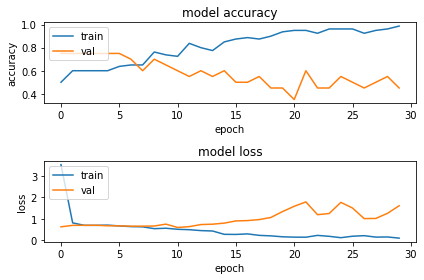

In [29]:
score = first_model.evaluate(X, Y, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

plt.figure(1) 

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

### 3
---

In [32]:
def grab_image(img_path):
    img = image.load_img(img_path, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

X = np.concatenate(
    [grab_image('./xception/images/image_%d.JPEG'%(i))
    for i in range(100)])

Y = np.loadtxt('./xception/class_labels.csv')
Y = keras.utils.to_categorical(Y)

print(X.shape)
print(Y.shape)

(100, 299, 299, 3)
(100, 2)


In [33]:
second_model = Xception(weights='imagenet')
second_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [122]:
preds = second_model.predict(X[0:100,:,:,:])

In [125]:
for i in range(100):
    print('Predicted:', decode_predictions(preds, top=1)[i][0][1])

Predicted: African_grey
Predicted: Rottweiler
Predicted: hog
Predicted: Gordon_setter
Predicted: Egyptian_cat
Predicted: lynx
Predicted: Bernese_mountain_dog
Predicted: Persian_cat
Predicted: Staffordshire_bullterrier
Predicted: tabby
Predicted: tabby
Predicted: Egyptian_cat
Predicted: Boston_bull
Predicted: Egyptian_cat
Predicted: Siamese_cat
Predicted: miniature_pinscher
Predicted: German_shepherd
Predicted: tabby
Predicted: soccer_ball
Predicted: feather_boa
Predicted: mouse
Predicted: Border_collie
Predicted: tabby
Predicted: Egyptian_cat
Predicted: Norfolk_terrier
Predicted: prairie_chicken
Predicted: siamang
Predicted: cocker_spaniel
Predicted: sorrel
Predicted: ram
Predicted: Egyptian_cat
Predicted: Bernese_mountain_dog
Predicted: German_shepherd
Predicted: dingo
Predicted: lynx
Predicted: bull_mastiff
Predicted: tiger_cat
Predicted: American_Staffordshire_terrier
Predicted: schipperke
Predicted: Siamese_cat
Predicted: sorrel
Predicted: tiger_cat
Predicted: ram
Predicted: tiger_

# 4
---

In [149]:
base_model = keras.applications.Xception(weights='imagenet',include_top=False)

new_model = base_model.output
new_model = keras.layers.GlobalAveragePooling2D()(new_model)

new_model = keras.layers.Dense(64,activation='relu')(new_model)

new_model = keras.layers.Dense(2,activation='softmax')(new_model)

third_model = keras.Model(inputs=base_model.input,outputs=new_model)

third_model.compile(loss=keras.losses.CategoricalCrossentropy(),
 optimizer=keras.optimizers.Adam(),
 metrics=[keras.metrics.CategoricalAccuracy()])

third_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [151]:
batch_size = 25
epochs = 3
history = third_model.fit(X, Y,
 batch_size=batch_size,
 epochs=epochs,
 verbose=1,
 validation_split = 0.4)

Epoch 1/3
3/3 [==============================] - 21s 7s/step - loss: 0.5377 - categorical_accuracy: 0.7833 - val_loss: 0.2633 - val_categorical_accuracy: 0.9000
Epoch 2/3
3/3 [==============================] - 20s 7s/step - loss: 0.1182 - categorical_accuracy: 0.9833 - val_loss: 0.2753 - val_categorical_accuracy: 0.9000
Epoch 3/3
3/3 [==============================] - 20s 7s/step - loss: 0.0467 - categorical_accuracy: 1.0000 - val_loss: 0.4500 - val_categorical_accuracy: 0.9000


# 5
---

4/4 [==============================] - 8s 2s/step - loss: 0.1806 - categorical_accuracy: 0.9600
Test loss: 0.18055200576782227
Test accuracy: 0.9599999785423279


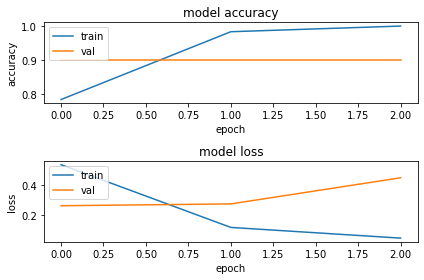

In [152]:
score = third_model.evaluate(X, Y, verbose = 1)
print("Test loss:", score[0])
print("Test accuracy:",score[1])

plt.figure(1) 

# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.tight_layout()
plt.show()

# 6
---

In [195]:
def decoder(one_pred):
    if one_pred[0] > one_pred[1]:
        return np.float32([1, 0])
    else:
        return [0, 1]

In [178]:
cat_preds = third_model.predict(X[0:100, :, :, :])

In [204]:
decoded = np.apply_along_axis(decoder, 1, cat_preds)

In [205]:
incorrect_cats = []
incorrect_non_cats = []
for i in range(100):
    if np.array_equal(decoded[i], Y[i]) == False:
        if Y[i][0] == 1:
            incorrect_non_cats.append(i)
        elif Y[i][1] == 0:
            incorrect_cats.append(i)

In [219]:
for i in incorrect_cats:
    plt.imshow(image.array_to_img(X[i, :, :, :]))
    plt.show()

# No cats classified incorrectly

# 7
---

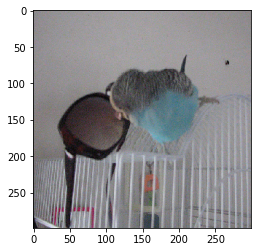

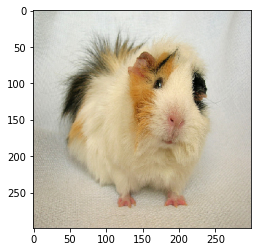

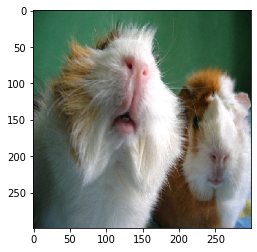

In [217]:
for i in incorrect_non_cats:
    plt.imshow(image.array_to_img(X[i, :, :, :]))
    plt.show()